In [6]:
import pyext.src.pynet_rng as rng
import jax
import jax.numpy as jnp


from collections import namedtuple
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from pathlib import Path
from functools import partial
import itertools
from itertools import combinations
import re
import requests
import json
import scipy as sp
import scipy.stats
import sklearn
import sys
import time

In [53]:
inv = jsp.linalg.inv

In [27]:
p = 1444
key = jax.random.PRNGKey(234)
A = jax.random.normal(key, shape=(p, p))
A = A.at[np.diag_indices(p)].set(2000)

In [28]:
for i in range(2):
    key, k1 = jax.random.split(key)
    A = rng.wishart(k1, A, p, p)

In [60]:
# Bayesian Hierarchical model

"""
sigma ~ exp(1)
alpha ~ beta(1, 1)
mu ~ norm(0, sigma * alpha)

"""

def step(key, alpha_0, beta_0):
    ks = jax.random.split(key, 4)
    prob = jax.random.beta(ks[0], alpha_0, beta_0)
    A = jax.random.bernoulli(ks[1], p)
    
    A = A + A.T
    
    
    
    
    
    
    mu_prior = jax.random.normal(k3)
    mu = jax.random.normal(k2)*sigma*alpha + mu_prior
    return mu, sigma, alpha

def score(p, A, K1, K2, Y1, Y2):
    r1 = jsp.stats.beta(p)
    r2 = jsp.stats.bernoulli(A)
    cov1 = jsp.linalg.inv(K1)
    cov2 = jsp.linalg.inv(K2)
    r3 = jsp.stats.multivariate_normal(Y1, cov1)
    r4 = jsp.stats.multivariate_normal(Y2, cov2)
    
    
    
    

In [66]:
key = jax.random.PRNGKey(123)
A = jax.random.bernoulli(key, 0.001, shape=(100, 100))
A = A + A.T
A

DeviceArray([[nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             ...,
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

$$ f(S) = \frac{|S|^{\frac{\nu - p - 1}{2}}}{2^{ \frac{\nu p}{2} }
           |\Sigma|^\frac{\nu}{2} \Gamma_p \left ( \frac{\nu}{2} \right )}
           \exp\left( -tr(\Sigma^{-1} S) / 2 \right) $$

In [59]:
def wishpdf(S, nu, p, Sigma):
    """
    \frac{|S|^{\frac{\nu - p - 1}{2}}}{2^{ \frac{\nu p}{2} }
           |\Sigma|^\frac{\nu}{2} \Gamma_p \left ( \frac{\nu}{2} \right )}
           \exp\left( -tr(\Sigma^{-1} S) / 2 \right)
    
    """
    
    # jnp.exp
    # jnp.trace
    # jsp.linalg.det
    # jsp.special.mulgammaln


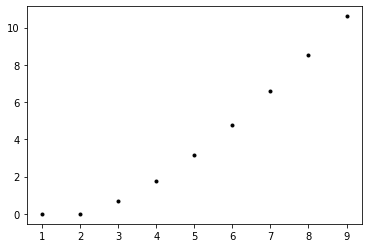

In [58]:
d = 1
a = jnp.arange(0 ,10)
plt.plot(a, jsp.special.multigammaln(a, d), 'k.')

In [50]:
jax.jit()

In [56]:
?jsp.special.multigammaln